In [1]:
import torch
import torch.nn as nn
import numpy as np
import scipy.io as sio
import time
import os
import argparse
import h5py
import torchvision.transforms as T
from PIL import Image
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

from model_patch2self import patch2self

# GPU
GPU_NUM = 1 #GPU number
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available()
                      else 'cpu')
torch.cuda.set_device(device) # change allocation of current GPU
print ('Current cuda device ', torch.cuda.current_device()) # check   

/home/beomgu/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/beomgu/anaconda3/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


Current cuda device  1


In [2]:
dir_data = "data/"

## Dataset #########################################################################
X_mat = sio.loadmat(dir_data + "input_invivo_test_diffusion_KAIST_ds10_IVIM_DKI_new.mat")
test_X = X_mat['input_invivo_test']
test_X = np.transpose(test_X,(1,2,0,3))
print(np.shape(test_X))

(128, 128, 5, 10)


In [3]:
## Model optimizing
Test_patch2self = patch2self(test_X,patch_radius=[0, 0, 0],model='mlp')


(10, 1, 81920)
Patch Extraction Done...
Training with patch-radius:  [0 0 0]
 -> Trained to Denoise Volume:  0
Denoising Volume  0  Complete...
 -> Trained to Denoise Volume:  1
Denoising Volume  1  Complete...
 -> Trained to Denoise Volume:  2
Denoising Volume  2  Complete...
 -> Trained to Denoise Volume:  3
Denoising Volume  3  Complete...
 -> Trained to Denoise Volume:  4
Denoising Volume  4  Complete...
 -> Trained to Denoise Volume:  5
Denoising Volume  5  Complete...
 -> Trained to Denoise Volume:  6
Denoising Volume  6  Complete...
 -> Trained to Denoise Volume:  7
Denoising Volume  7  Complete...
 -> Trained to Denoise Volume:  8
Denoising Volume  8  Complete...
 -> Trained to Denoise Volume:  9
Denoising Volume  9  Complete...


Text(0.5, 1.0, 'Denoised Img')

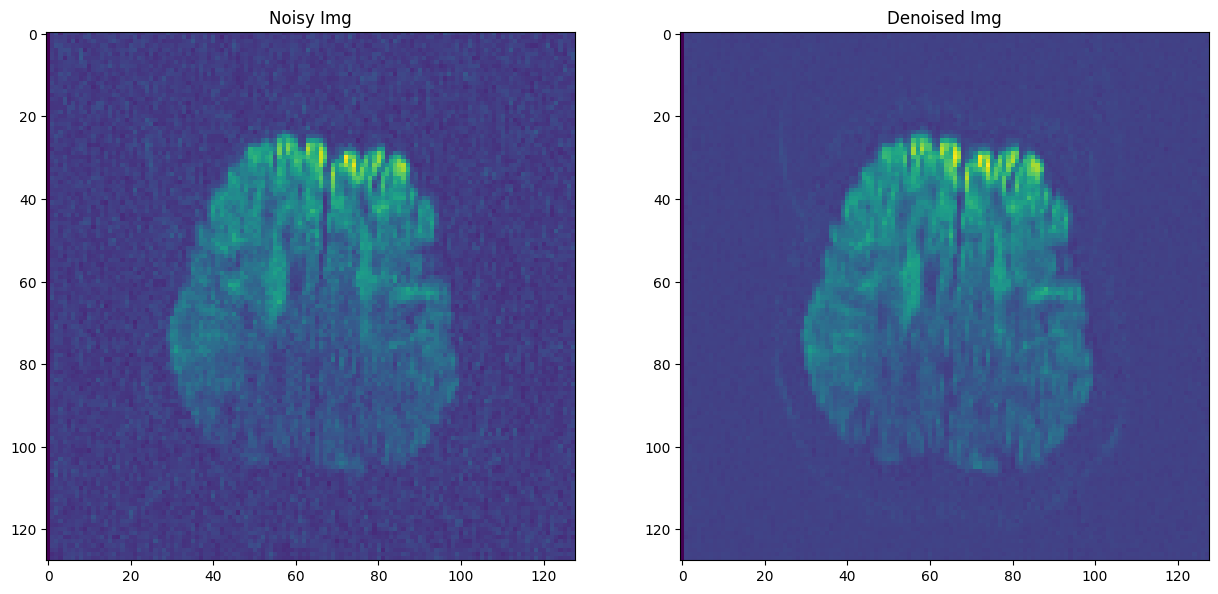

In [5]:
slice = 3
bvalue_num = 9

img1 = test_X[:,:,slice,bvalue_num]
img2 = Test_patch2self[:,:,slice,bvalue_num]

fig, ax = plt.subplots(1, 2,figsize=(15, 15))

ax[0].imshow(img1)
ax[0].set_title('Noisy Img')

ax[1].imshow(img2)
ax[1].set_title('Denoised Img')